Load a random vector with the divide-and-conquer state preparation.

In [1]:
import numpy as np
from encoding import Encoding
from qiskit import Aer, ClassicalRegister, execute, visualization

In [2]:
# input_vector = range(1, 17)
input_vector = 2*np.random.rand(4)-1

input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2
print((input_vector))

[ 0.47393858 -0.58028563  0.21953193 -0.62486521]


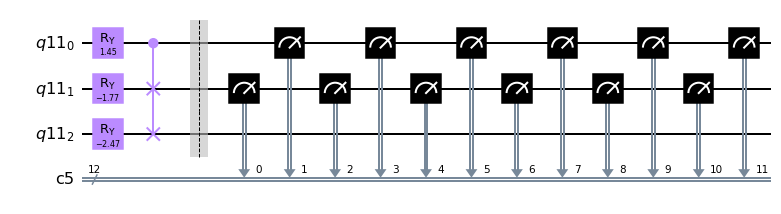

In [10]:
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()


for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')

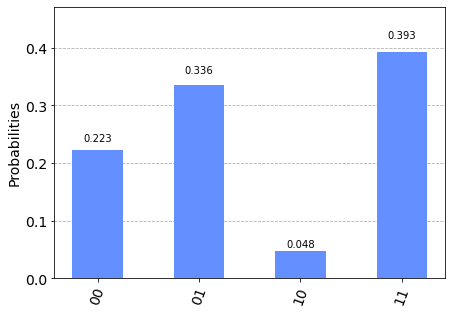

In [4]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 100000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [5]:
expected_probabilities

array([0.22461778, 0.33673142, 0.04819427, 0.39045653])